# Modelling of Neutron Star with Python

#### <mark>Problem Statement: </mark>

Modelling of a Neutron star using the numerical method known as "Runge-Kutta method of 4th order (RK4)". 
We will be doing this with a Classical approach and Relativistic aproach.
- Classical approach : Using Hydrostatic Equilibrium
- Relativistic approach : Using Tolman-Oppenheimer-Volkoff (TOV) equations.

**Runge Kutta Method** is a family of numerical methods used to solve ODE and system of Ordinary Differential Equations. It uses iterative steps to get an approximate solution of an ODE at any given point of time.

**Hydrostatic Equilibrium Equations** discuss how the forces of gravity and gas pressure balance each other out so that the neutron star balances its shape and size.

We will also be using the **Planck's System of Units** which sets the value of constants to 1 which allows for easier and more meaningful comparison between physical quantities.

**Mass Profile :** This describes the variation in total mass enclosed within different radii. It is always the mass enclosed within the radius, r.

**Pressure Profile :** This describes how the pressure varies from the center of the star till the surface. On the surface / crust of the star the pressure is 0 (or almost 0).

**Pressure Description :** It is the result of balance between $F_g$ and pressure from degenerate neutron matter. It gives insight into the internal structure and properties of a star.

#### <mark>Overall Problem Statement</mark>:

So the overall problem statement can be summed up as:
- Generating mass and pressure profiles of a neutron star.
- Using RK4 Numerical Methods to solve the ODEs - Classical and Relativistic.
- Comparing the results from Classical and Relativistic Models.

####  Defining the functions:

In [9]:
#importing the necessary libraries

import numpy as np                     #for defining arrays and other numerical calculations
import matplotlib.pyplot as plt        #for visualising our results

#### Concept of "initial number density" of a neutron star:

- It refers to the number of neutrons per unit volume at the very beginning of the star's formation.
- This function uses the "Newton-Raphson" method to solve the equation that determines 'n'. This method is used as the equations are non-linear in nature.
- The euqation for this is obtained by substituting the expressions for pressure and energy density from the TOV equations into the hydrostatic equilibrium equations.

**Equation to be used in Newton Raphson Method:-**      
$f(n) = {236.n^{2.54} + n.m_n - \rho_s}$       
$f'(n) = 236 \times 2.54 \times n^{1.54} + m_n$

**Newton Raphson Method:-**          
$n_{i+1} = n_i - \frac{f(n_i)}{f'(n_i)}$

In [5]:
#Python Code for this:

In [6]:
def initial_n():
    
    '''Initial number of neutrons per unit volume at radius=0'''
    
    n = 1                                   # Initial value of n
    err = 1                                 # Inital Error
    tol = 1e-15                             # Tolerance Value
    count = 0                               # Tracking total number of iterations until it converges

    # Newton-Raphson method
    
    while err > tol :                       # Until n converges
        count += 1                          # Increment the count of the iteration
        fn = 236*n**(2.54) + n*mn - rho_s   # Finding f(n_old)
        dfn = 236*2.54*n**(1.54) + mn       # Finding f'(n_old)
        temp = n - fn/dfn                   # Calculate n_new using Newton Raphson Method
        err = np.abs(n-temp)                # Calculate the error
        n = temp                            # Using this n value in next iteration for f(n_old), f'(n_old)
        
    print("Newton-Raphson Converged after ", count, "iterations")
    return n

#### Concept of "Energy density" of a neutron star:

- This is density ($\rho$) of the neutron star for the given pressure (p) at a particular point. It uses the TOV equations to determine the relationship between the pressure and density
- First, we need to calculate the number density(n) of the neutron star using the input pressure (p) and the known values of the neutron mass (mn) and the nuclear density ($\rho_s$)
- The equation used is: $n = (\frac{p.\rho_s}{363.44})^{(1/2.54)}$
- From the above known value of 'n', we calculate te energy density ($\rho$) using the TOV equation: ${\rho(p) = \frac{236.n^{2.54} + n.m_n}{\rho_s}}$

In [7]:
#Python Code for this:

In [8]:
def rho(p):

    '''Energy Density of a neutron star at a given pressure'''
    
# "rho_s" is the Central Density at radius = 0
# "mn" is the mass of a neutron
# "n" is the number density at a particular pressure
    
    n = (p*rho_s/363.44)**(1/2.54)
    return (236. * n**2.54 + n *mn)/rho_s

#### Understanding "Pressure Gradient" :


#### Using 'Classical Model' :

- This model is used to describe the equilibrium structure of the star and is based on the hydrostatic equilibrium equation, which relates the pressure gradient force to the gravitational force inside the star.
- It assumes that the star is composed of non-interacting, non-relativistic particles, and neglects the effects of special and general relativity on the star's matter.

#### Required equation of pressure gradient for the classical model : $\frac{dP}{dr} = -\frac{Gm(r)}{r^2}$$\rho$
 But since we are using Planck Unit System, the value of 'G' is set to be 1. 
 
So, the updated equation is: $\frac{dP}{dr} = -\frac{m}{r^2}$$\rho$


#### Using 'Relativistic Model' :

- TOV equations provide a framework for calculating the properties of a spherically symmetric, non-rotating, and a relativistic neutron star, such as its mass, radius, and central density. So it can be a good starting point for understanding the basic structure of the neutron star.

#### Required equation of pressure gradient for the relativistic model : $\frac{dP}{dr} = $  $-(\rho + P/c^2)\frac{Gm(r) + 4\pi GPr^3/c^2}{r[r - 2Gm(r)/c^2]}$
But since we are using Planck Unit system, the value of $G=c=4\pi=1$

So, the updated equation is: $\frac{dP}{dr} = -\frac{(\rho + P)(m + Pr^3)}{r^2 - 2mr}$

**NOTE:**
- Since at the center of the star, the value of r=0, taking this value will actually be a problem as in the equations for both the model, the denominator becomes 0. So we take a very small value of r such as $1\times10^{-20}$
- We shall also use "flagship variable" to access the models in our program. For flag = 0 we shall use the 'Classical Model' and for flag = 1, we shall use the 'Relativistic Model'.

In [10]:
#Python Code for this:

In [12]:
def dp_dr(r,m,p,flag):

    '''Pressure Gradient of neutron star'''
    
# 'r' is the distance from the center of neutron star
# 'm' is the mass enclosed within the value of r
# 'p' is the pressure at that value of r
# 'flag' is a flagship variable to choose between classical and relativistic models


    if flag == 0:
        # Classical Model
        y = -m*rho(p)/(r**2 + 1e-20)

    else:
        # Relativistic Model
        y = -(p+rho(p))*(m + p*r**3)/(r**2 - 2*m*r + 1e-20)

    return y

#### Unserstanding "Mass Gradient":

- It is the change in mass enclosed within a radius r, with respect to the change in radius r, at a given pressure p.
- So, based on the density profile of the star, the **mass gradient formula** can be written as: $\frac{dm}{dr} = 4\pi r^2\rho$

But since we are using the Planck Unit System, we take $4\pi = 1$.

So, the updated mass gradient equation is: $\frac{dm}{dr} = r^2\rho$

In [13]:
#Python Code for this:

In [14]:
def dm_dr(r,m,p):

    '''Mass Gradient of neutron star'''
    
# Same r, m, p that is used for pressure gradient are to be used for mass gradient

    return rho(p)*r**2

#### Runge Kutta Method of 4th Order (RK4) :

<img src="https://lowebms.readthedocs.io/en/latest/_images/RK4.png" alt="Image Description" width = 35%>

- We are going to work with two systems of Ordinary Differential Equations: The pressure and mass gradient equations. Both the equations were the functions of r, m and P.
- Now we use RK4 method to solve these equations
- We must have initial conditions for r for which m and P are defined to get started with RK4 sovler as it calculates the next values of m and P dependent on the previous value that is some h units next to the initial r, that is, new values of m and P will be then calculated on $r_{new} = r_{old} + h.$
- The value of $h$ determines the total steps to be performed in RK4 solver. For example, if $r_{0} = 0$ and $r_{1} = 0.4$ and if you choose the value of h to be 0.2 then it would take 2 steps to go from r = 0 to r = 0.4.
- The concept is that in order to go from $r_{old}$ to $r_{new}$ RK4 calculates four different gradients, namely, $k_{11}$, $k_{12}$, $k_{13}$, $k_{14}$ for m and $k_{21}$, $k_{22}$, $k_{23}$, $k_{24}$ for P.


**Calculation of Gradient:**

  - $k_{11} = \frac{dm}{dr}(r, m, P)$     
  $k_{21} = \frac{dP}{dr}(r, m, P)$

  - $k_{12} = \frac{dm}{dr}(r+0.5h, m+0.5hk_{11}, P+0.5hk_{21})$  
  $k_{22} = \frac{dP}{dr}(r+0.5h, m+0.5hk_{11}, P+0.5hk_{21})$  

  - $k_{13} = \frac{dm}{dr}(r+0.5h, m+0.5hk_{12}, P+0.5hk_{22})$  
  $k_{23} = \frac{dP}{dr}(r+0.5h, m+0.5hk_{12}, P+0.5hk_{22})$  

  - $k_{14} = \frac{dm}{dr}(r+h, m+hk_{13}, P+hk_{23})$  
  $k_{24} = \frac{dP}{dr}(r+h, m+hk_{13}, P+hk_{23})$  

**Updation Step for m and P:**
  - $m_{new} = m_{old} + \frac{h}{6}(k_{11} + 2k_{12} + 2k_{13} + k_{14})$
  - $P_{new} = P_{old} + \frac{h}{6}(k_{21} + 2k_{22} + 2k_{23} + k_{24})$
 
- We need to keep on updating m and P for the desired number of steps or until the solution has reached a desired value of r.

In [17]:
#Python Code for this:

In [18]:
def RK4Solver(r,m,p,h,flag):

    '''Runge - Kutta method of 4th order: Calculates 4 different pressure and mass gradients'''
    
# K1n is the Mass Gradients
# K2n is the Pressure Gradients

    y = np.zeros(2)      # For storing the next values of m and p

    # Gradient 1 at start point
    k11 = dm_dr(r, m, p)
    k21 = dp_dr(r, m, p, flag)

    # Gradient 2 at mid of start and end point
    k12 = dm_dr(r + 0.5*h, m + 0.5*k11*h, p + 0.5*k21*h)
    k22 = dp_dr(r + 0.5*h, m + 0.5*k11*h, p + 0.5*k21*h, flag)

    # Gradient 3 at mid of start and end point
    k13 = dm_dr(r + 0.5*h, m + 0.5*k12*h, p + 0.5*k22*h)
    k23 = dp_dr(r + 0.5*h, m + 0.5*k12*h, p + 0.5*k22*h, flag)

    # Gradient 4 at end point
    k14 = dm_dr(r + h, m + k13*h, p + k23*h)
    k24 = dp_dr(r + h, m + k13*h, p + k23*h, flag)

    # Updation of m and p
    y[0] = m + h*(k11 + 2*k12 + 2*k13 + k14)/6
    y[1] = p + h*(k21 + 2*k22 + 2*k23 + k24)/6

    return y

#### Plotting the "Mass profile" and the "Pressure Profile" :

In [20]:
#Python Code for this:

In [43]:
def plot_data(color, label):

    # Mass Profile
    
    plt.subplot(1, 2, 1)
    plt.plot(r*R0*1e-18, m*M0/Ms, color = color, linewidth = 1.5, label = label)
    plt.xlabel('Distance, $r$ (km)', fontsize = 13)
    plt.ylabel('Mass, $M/M_{sun}$', fontsize = 13)
    plt.title('Mass Profile of a Neutron Star', color = 'tab:red', weight = 'bold', fontsize = 15)
    plt.xlim(left = 0)
    plt.ylim(bottom = 0)
    plt.legend(fontsize = 13, frameon = False)

    # Pressure Profile
    
    plt.subplot(1, 2, 2)
    plt.plot(r*R0*1e-18, p*rho_s, color = color, linewidth = 1.5, label = label)
    plt.xlabel('Distance, $r$ (km)', fontsize = 13)
    plt.ylabel('Pressure, $P$ $(MeV/fm^{3})$', fontsize = 13)
    plt.title('Pressure Profile of a Neutron Star', color = 'tab:green', weight = 'bold', fontsize = 15)
    plt.xlim(left = 0)
    plt.ylim(bottom = 0)
    plt.legend(fontsize = 13, frameon = False)

#### Simulation parameters and Conversion Factors: 

In [44]:
hc = 197.327                                # conversion factor in MeV fm (h bar * c)
G = hc * 6.67259e-45                        # gravitational constant in MeV^-1 fm^3 kg^-1
Ms = 1.1157467e60                           # mass of Sun in MeV
rho_s = 1665.3                              # central density of neutron star (density at r = 0) in MeV/fm^3
M0 = (4*3.14159265*(G**3)*rho_s)**(-0.5)
R0 = G*M0
mn = 938.926                                # mass of a neutron in MeV c^-2

#### Initialising arrays and values:

In [45]:
'''Values for radius, step size and tolerance value'''
N = 1501                              # Total number of data points
r = np.linspace(0,15,N)               # values of radius to compute enclosed mass within it, pressure and density profiles
h = r[1]-r[0]                         # step size for RK4Solver
tol = 9e-5                            # tolerance for RK4Solver

'''Arrays to store the updation values in RK4Solver'''
m = np.zeros(N)                       # mass
p = np.zeros(N)                       # pressure

'''Initial Number Density of Neutrons at r = 0'''
ni = initial_n()

'''Setting intial values in the array - values at the center of the neutron star'''
r[0] = 0                              # radius
m[0] = 0                              # mass
p[0] = 363.44 * (ni**2.54)/rho_s      # pressure

'''Setting flags for choosing between classical and relativistic model'''
flag_set = [0,1]

'''Printing Inital Values'''

print("Initial number density, ni =", ni)
print("Initial Pressure, P[0] = ", p[0]*rho_s, "MeV/fm^3")
print("Simulation range, R = 0 to R =", r[-1]*R0*1e-18, "km") # 1e-18 is the conversion factor from femtometers to kilometers
print("Step size for RK4 Solver:", h)


Newton-Raphson Converged after  5 iterations
Initial number density, ni = 1.2918969375342138
Initial Pressure, P[0] =  696.5487390842761 MeV/fm^3
Simulation range, R = 0 to R = 90.36486611870906 km
Step size for RK4 Solver: 0.01


## <mark> Modelling a Neutron Star </mark>


Classical Model Results: P < 9e-05 found after 275 runs
Initial density, rho_s =  1665.3 MeV/fm^3
Total mass =  10.075592302895434 times Solar mass
Radius of the Neutron star =  16.627135365842467 km

Relativistic Model Results: P < 9e-05 found after 161 runs
Initial density, rho_s =  1665.3 MeV/fm^3
Total mass =  1.878156929086536 times Solar mass
Radius of the Neutron star =  9.759405540820579 km



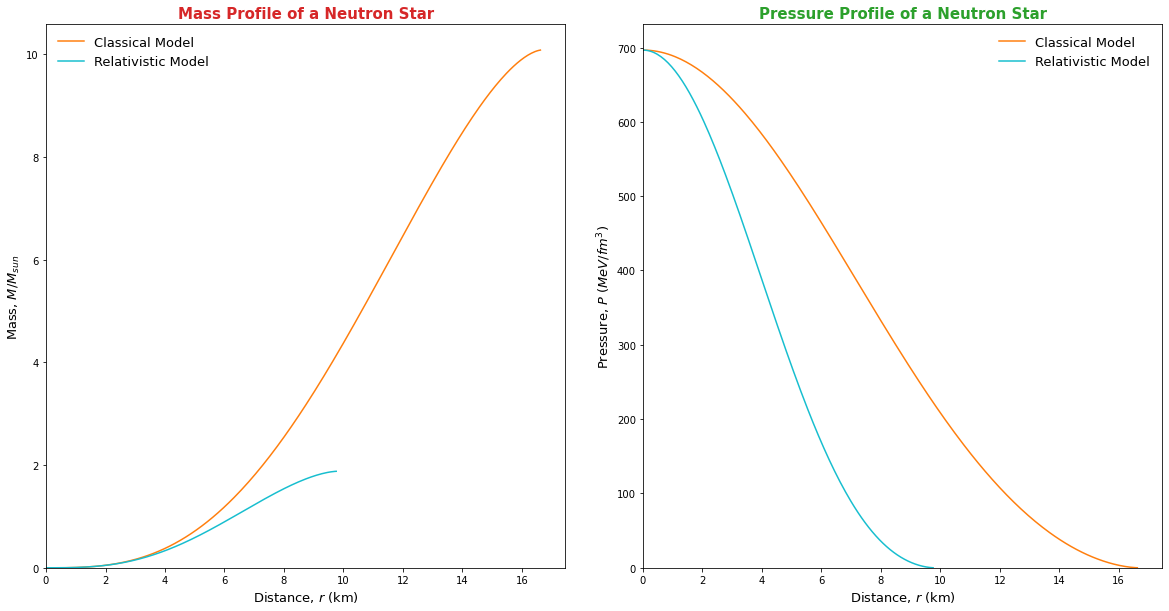

In [46]:
'''Using RK4 Numerical Method for modeling a neutron star'''
plt.figure(figsize = (20, 10))                                   # setting up the figure size for subplots
for k in range(0,2):                                            # k will take two values in this run --> 0 and 1
    flag = flag_set[k]                                          # flag_set[0] = 0, flag_set[1] = 1
    for i in range(0,N-1):                                      # for 1500 iterations
        if flag == 0:                                           # if the flag is set to 0
            [m[i+1], p[i+1]] = RK4Solver(r[i],m[i],p[i],h,flag) # use classical model
        else:                                                   # if not 0
            [m[i+1], p[i+1]] = RK4Solver(r[i],m[i],p[i],h,flag) # use relativistic model
        if p[i+1] < tol:                                        # if the value of the pressure goes below tolerance (close to 0 as we know)
            break                                               # the simulation is completed
    print()                                                     # for a new line between outputs
    if i == N-2:                                                # if the pressure value was not able to go below the tolerance value
        lbl1 = "Program didn't converge to P = 0, extend the maximum value of r" # print to increase the itetarations of simulation --> values of r
    else:                                                       # if simulation stopped before this
        lbl1 = f"P < {tol} found after {i} runs"                # print the conclusion statement

    '''Keep only the used indices of array discarding the remaining ones'''
    m = m[:i+2] # m[0:i+2 --> Exclusive index]
    p = p[:i+2]
    r = r[:i+2]

    '''Time to visualise and print the results'''
    if flag == 0:
        lbl = "Classical Model"
        plot_data('tab:orange', "Classical Model")
    else:
        lbl = "Relativistic Model"
        plot_data('tab:cyan', "Relativistic Model")

    '''Printing the overall output'''
    print ("==================================================================")
    print (lbl, "Results:", lbl1)
    print ("==================================================================")
    print ("Initial density, rho_s = ", rho_s, "MeV/fm^3")
    print ("Total mass = ", m[-1]*M0/Ms, "times Solar mass")
    print ("Radius of the Neutron star = ", r[-1]*R0*1e-18, "km")

print()
plt.subplots_adjust(wspace = 0.15)

## Conclusion:

For the Classical Model to meet the condition for pressure, it took 275 iterations while for the Relativistic approach, it took 161 iterations. So the radius of the neutron star for the Classical Model will be higher for the Classical model than that of the Relativistic Model. So more mass will be enclosed within that particular value of 'R' for the Classical Model. 

Let us analyse which of these two models are giving us a good approximation as compared to what happens in the reality of a neutron star.

A typical range of the mass of the neutron star lies between 1.4 times the solar mass to about 2 - 2.5 times the solar mass. But for the Classical Model we see the calculated mass is falling way beyond the known range.  But for the Relativistic Model the calculated mass is falling within the given range. 

Similarly, for the Radius of the neutron star, it falls between 8-9 km to about 15-16 km. So, for the Classical Model, it is falling slightly outside the range while for the Relativistic Model the radius is within the given range. 

Therefore, a non-relativistic model is not a good approximation for describing the properties of neutron stars, and a relativistic model is necessary to accurately predict the mass and other properties of neutron stars.